## SMAI Assignment - 1

### Q1.0 Dataset Generation

In [32]:
# Example: compute required seed from IIITH username
import hashlib, numpy as np

import numpy as np
import pandas as pd
import hashlib

class StudentDataset:
    """
    A class to generate and store student dataset with attributes:
    gender, major, program, and GPA.
    
    Attributes:
        num_students (int): Number of student records to generate.
        seed (int): Random seed for reproducibility.
        rng (np.random.Generator): Random number generator instance.
        df (pd.DataFrame): Generated dataset stored as a DataFrame.
    """

    def __init__(self, num_students: int, seed: int):
        """
        Initializes the dataset with the given number of students and seed.
        Generates the full dataset once during initialization.
        """
        self.num_students = num_students
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        # Generate dataset
        self.df = self.assemble_dataframe()

    def get_full_dataframe(self) -> pd.DataFrame:
        """
        Returns the complete dataset as a pandas DataFrame.
        """
        return self.df

    def generate_gender(self) -> list[str]:
        """
        Generates gender distribution for students.
        Probabilities: Male (65%), Female (33%), Other (2%).
        """
        return self.rng.choice(
            ["Male", "Female", "Other"],
            size=self.num_students,
            p=[0.65, 0.33, 0.02]
        ).tolist()

    def generate_major(self) -> list[str]:
        """
        Generates major distribution for students.
        Probabilities: B.Tech (70%), MS (20%), PhD (10%).
        """
        return self.rng.choice(
            ["B.Tech", "MS", "PhD"],
            size=self.num_students,
            p=[0.70, 0.20, 0.10]
        ).tolist()

    def generate_program(self, majors: list[str]) -> list[str]:
        """
        Generates program distribution conditioned on major.
        """
        programs = []
        for major in majors:
            if major == "B.Tech":
                probs = [0.40, 0.40, 0.10, 0.10]
            elif major == "MS":
                probs = [0.30, 0.30, 0.20, 0.20]
            else:  # PhD
                probs = [0.25, 0.25, 0.25, 0.25]
            
            prog = self.rng.choice(
                ["CSE", "ECE", "CHD", "CND"],
                p=probs
            )
            programs.append(prog)
        return programs

    def generate_gpa(self, majors: list[str]) -> list[float]:
        """
        Generates GPA values based on major using normal distributions:
        - B.Tech: N(7.0, 1.0)
        - MS: N(8.0, 0.7)
        - PhD: N(8.3, 0.5)
        Values are clipped to [4.0, 10.0].
        """
        gpas = []
        for major in majors:
            if major == "B.Tech":
                gpa = self.rng.normal(7.0, 1.0)
            elif major == "MS":
                gpa = self.rng.normal(8.0, 0.7)
            else:  # PhD
                gpa = self.rng.normal(8.3, 0.5)

            # Clip GPA to range [4.0, 10.0]
            gpa = np.clip(gpa, 4.0, 10.0)
            gpas.append(round(gpa, 2))  # Round for readability
        return gpas

    def assemble_dataframe(self) -> pd.DataFrame:
        """
        Assembles the full dataset with gender, major, program, and GPA.
        """
        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        df = pd.DataFrame({
            "Gender": genders,
            "Major": majors,
            "Program": programs,
            "GPA": gpas
        })
        return df

username = "hiten.garg"   # <-- replace with the part before @
seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
# rng = np.random.default_rng(seed)

# Create dataset
dataset = StudentDataset(num_students=10000, seed=seed)

df = dataset.get_full_dataframe()
print(df.head())
print()
print(df.describe(include="all"))

   Gender   Major Program   GPA
0  Female  B.Tech     ECE  7.31
1    Male  B.Tech     ECE  7.68
2    Male  B.Tech     CSE  7.97
3    Male  B.Tech     ECE  6.75
4  Female      MS     ECE  7.61

       Gender   Major Program           GPA
count   10000   10000   10000  10000.000000
unique      3       3       4           NaN
top      Male  B.Tech     CSE           NaN
freq     6472    7027    3732           NaN
mean      NaN     NaN     NaN      7.328968
std       NaN     NaN     NaN      1.035183
min       NaN     NaN     NaN      4.000000
25%       NaN     NaN     NaN      6.610000
50%       NaN     NaN     NaN      7.390000
75%       NaN     NaN     NaN      8.100000
max       NaN     NaN     NaN     10.000000


### Q1.1 Dataset Analysis

#### (a) Visualizations

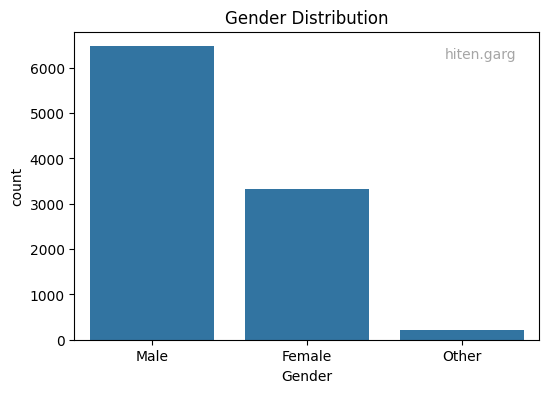

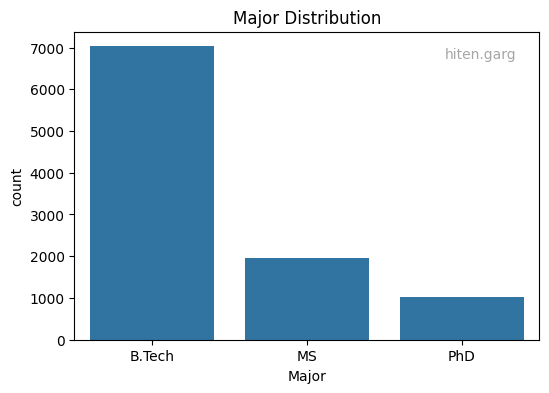

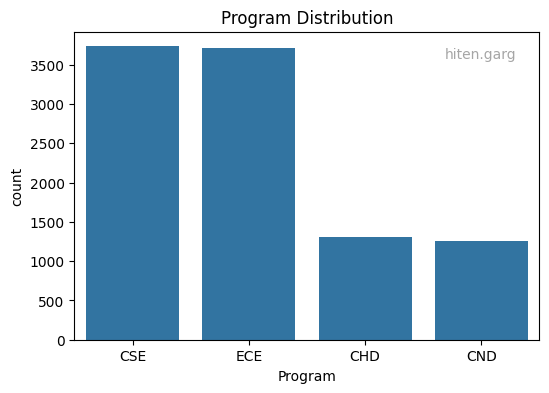

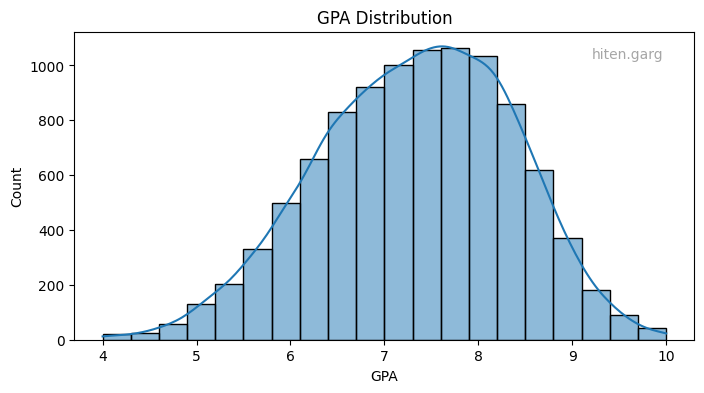

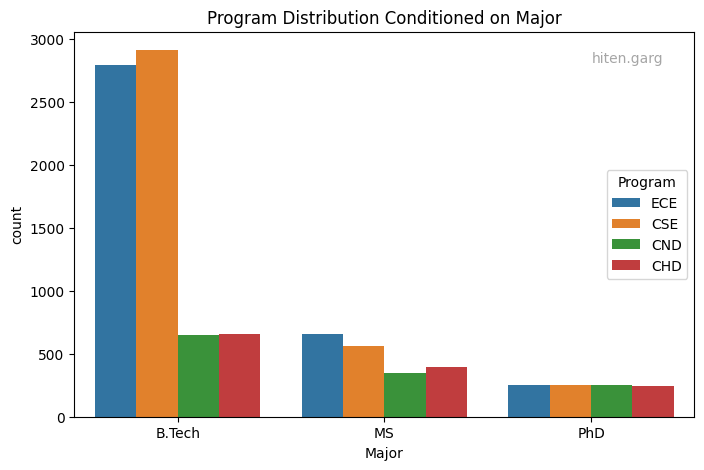

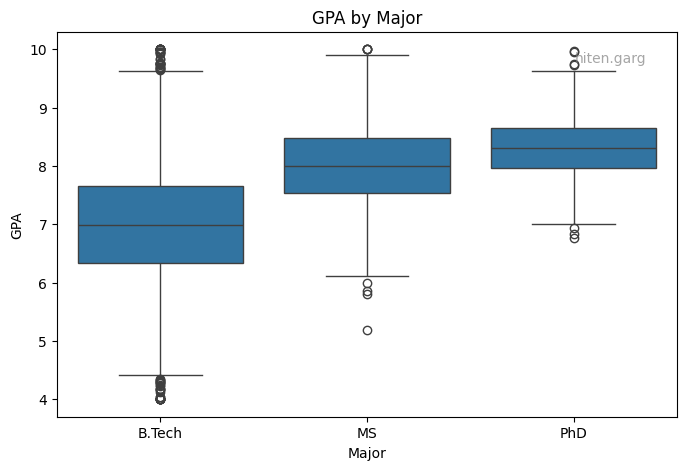

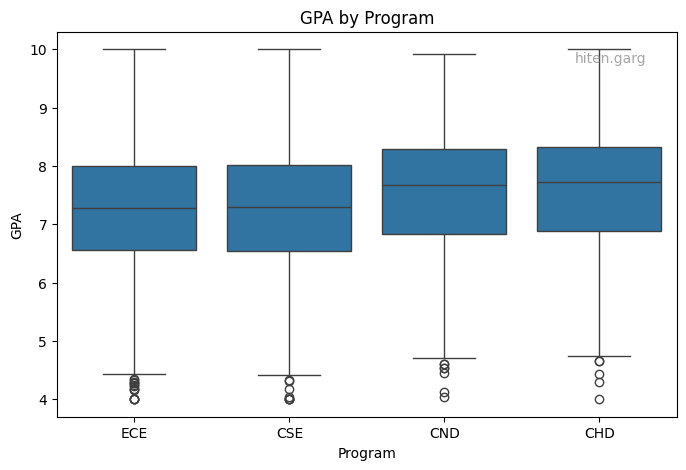

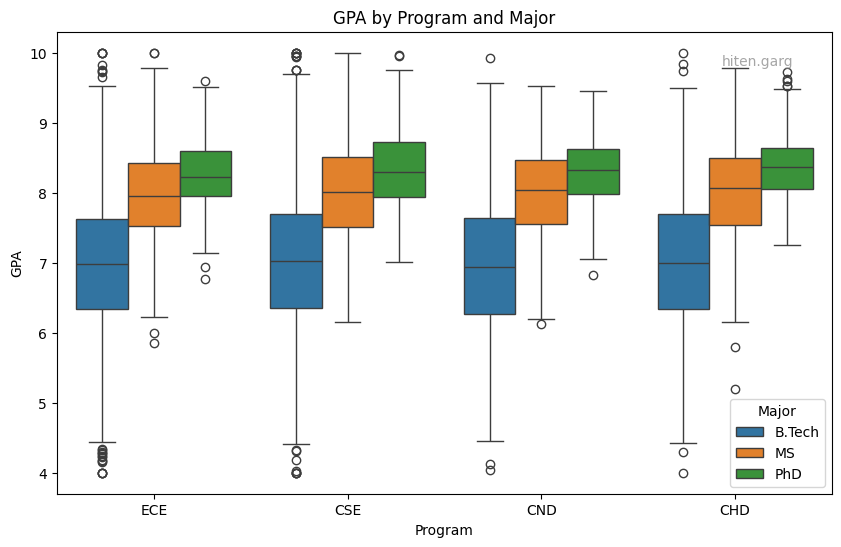

,Gender,Major,Program,GPA
8416,Male,B.Tech,ECE,8.34
3432,Male,B.Tech,CND,7.07
1007,Male,MS,ECE,8.36
612,Male,B.Tech,CHD,6.83
4585,Female,B.Tech,ECE,7.14
...,...,...,...,...
8836,Male,PhD,CND,7.49
9685,Male,B.Tech,ECE,4.87
3625,Male,PhD,CND,8.53
7758,Male,MS,CHD,8.08


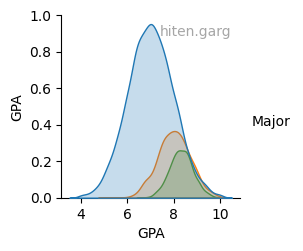

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def add_username_watermark():
    plt.text(
        0.95, 0.95, "hiten.garg",
        ha="right", va="top",
        transform=plt.gca().transAxes,
        fontsize=10, color="gray", alpha=0.7
    )

# --- Visualization methods ---
def plot_gender_distribution(self):
    plt.figure(figsize=(6,4))
    sns.countplot(x="Gender", data=self.df, order=["Male","Female","Other"])
    plt.title("Gender Distribution")
    add_username_watermark()
    plt.show()

def plot_major_distribution(self):
    plt.figure(figsize=(6,4))
    sns.countplot(x="Major", data=self.df, order=["B.Tech","MS","PhD"])
    plt.title("Major Distribution")
    add_username_watermark()
    plt.show()

def plot_program_distribution(self):
    plt.figure(figsize=(6,4))
    sns.countplot(x="Program", data=self.df, order=["CSE","ECE","CHD","CND"])
    plt.title("Program Distribution")
    add_username_watermark()
    plt.show()

def plot_gpa_distribution(self, bins=20):
    plt.figure(figsize=(8,4))
    sns.histplot(self.df["GPA"], bins=bins, kde=True)
    plt.title("GPA Distribution")
    plt.xlabel("GPA")
    plt.ylabel("Count")
    add_username_watermark()
    plt.show()

def plot_program_by_major(self):
    plt.figure(figsize=(8,5))
    sns.countplot(x="Major", hue="Program", data=self.df)
    plt.title("Program Distribution Conditioned on Major")
    add_username_watermark()
    plt.show()

def plot_gpa_by_major(self):
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Major", y="GPA", data=self.df)
    plt.title("GPA by Major")
    add_username_watermark()
    plt.show()

def plot_gpa_by_program(self):
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Program", y="GPA", data=self.df)
    plt.title("GPA by Program")
    add_username_watermark()
    plt.show()

def plot_gpa_by_program_and_major(self):
    plt.figure(figsize=(10,6))
    sns.boxplot(x="Program", y="GPA", hue="Major", data=self.df)
    plt.title("GPA by Program and Major")
    add_username_watermark()
    plt.show()

def plot_sampled_dataset(self, n=100):
    sample_df = self.df.sample(n, random_state=self.seed)
    display(sample_df)

def plot_entire_dataset_summary(self):
    sns.pairplot(self.df, hue="Major")  # uses all numeric columns automatically
    add_username_watermark()            # optional watermark
    plt.show()


# --- Attach the methods to your existing class ---
StudentDataset.plot_gender_distribution = plot_gender_distribution
StudentDataset.plot_major_distribution = plot_major_distribution
StudentDataset.plot_program_distribution = plot_program_distribution
StudentDataset.plot_gpa_distribution = plot_gpa_distribution
StudentDataset.plot_program_by_major = plot_program_by_major
StudentDataset.plot_gpa_by_major = plot_gpa_by_major
StudentDataset.plot_gpa_by_program = plot_gpa_by_program
StudentDataset.plot_gpa_by_program_and_major = plot_gpa_by_program_and_major
StudentDataset.plot_sampled_dataset = plot_sampled_dataset
StudentDataset.plot_entire_dataset_summary = plot_entire_dataset_summary

# --- Example usage ---
dataset.plot_gender_distribution()
dataset.plot_major_distribution()
dataset.plot_program_distribution()
dataset.plot_gpa_distribution()
dataset.plot_program_by_major()
dataset.plot_gpa_by_major()
dataset.plot_gpa_by_program()
dataset.plot_gpa_by_program_and_major()
dataset.plot_sampled_dataset()
dataset.plot_entire_dataset_summary()


#### (b) GPA Summary Statistics

In [34]:
def gpa_mean_std(self) -> tuple[float, float]:
    """
    Computes and returns the mean and standard deviation of GPA.

    Returns:
        tuple: (mean_gpa, std_gpa)
    """
    mean_gpa = self.df["GPA"].mean()
    std_gpa = self.df["GPA"].std()
    return mean_gpa, std_gpa

StudentDataset.gpa_mean_std = gpa_mean_std

mean_gpa, std_gpa = dataset.gpa_mean_std()
print(f"Mean GPA: {mean_gpa:.2f}")
print(f"Standard Deviation of GPA: {std_gpa:.2f}")


Mean GPA: 7.33
Standard Deviation of GPA: 1.04


**Mean GPA:** 7.33  
**Standard Deviation of GPA:** 1.04  

**Observations:**

- On average, students in the dataset have a GPA of 7.33 out of 10, indicating that most students are performing slightly above the midpoint but below the top end.  
- The GPA values have a standard deviation of 1.04, showing a moderate variation in student performance; most GPAs lie roughly between 6.3 and 8.3 (mean ± 1 std).  
- The dataset exhibits fairly consistent academic performance with a moderate spread.  
- There may be some outliers at the lower end (clipped at 4.0) and higher end (clipped at 10.0), but the majority of students are clustered around the mean.


#### (c) Program-Major Combinations

Major    B.Tech   MS  PhD
Program                  
CHD         660  394  248
CND         652  344  255
CSE        2915  563  254
ECE        2800  659  256


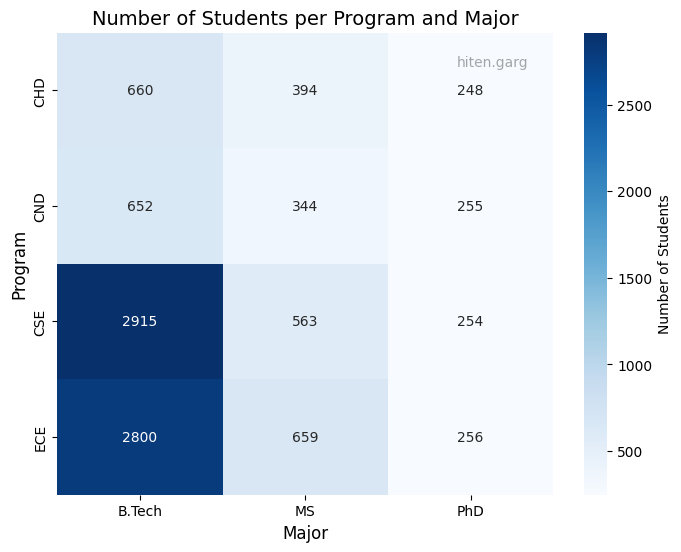

In [35]:
def count_students_per_program_major_pair(self) -> pd.DataFrame:
    """
    Count the number of students for each unique (Program, Major) pair.
    
    Returns:
        pd.DataFrame: A DataFrame with Programs as rows, Majors as columns,
                      and counts as values.
    """
    counts_df = (
        self.df.groupby(["Program", "Major"])
        .size()
        .unstack(fill_value=0)
    )
    return counts_df


def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
    """
    Visualize the (Program, Major) student counts using a heatmap.
    
    Args:
        counts_df (pd.DataFrame): DataFrame with counts of students per Program-Major pair.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(counts_df, annot=True, fmt="d", cmap="Blues", cbar=True)

    plt.title("Number of Students per Program and Major", fontsize=14)
    plt.xlabel("Major", fontsize=12)
    plt.ylabel("Program", fontsize=12)

    # Add label for colorbar
    cbar = plt.gca().collections[0].colorbar
    cbar.set_label("Number of Students")

    # Add username watermark
    add_username_watermark()

    plt.show()

StudentDataset.count_students_per_program_major_pair = count_students_per_program_major_pair

counts_df = dataset.count_students_per_program_major_pair()
print(counts_df)

StudentDataset.visualize_students_per_program_major_pair = visualize_students_per_program_major_pair

dataset.visualize_students_per_program_major_pair(counts_df)

### Q1.2 Simple vs Stratified Sampling

In [36]:
import numpy as np
import pandas as pd

def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
    """
    Simple random sampling (without replacement).
    Repeats `repeats` times, each time sampling `n` students uniformly from the full dataset.
    For each sample, compute the sample mean and sample std (ddof=1) of GPA.
    
    Returns:
        (mean_of_means, mean_of_stds)
        - mean_of_means: average of the 50 sample means (estimator of population mean)
        - mean_of_stds : average of the 50 sample standard deviations (typical within-sample spread)
    """
    N = len(self.df)
    if n > N:
        raise ValueError("n cannot exceed the dataset size.")
    
    gpas = self.df["GPA"].to_numpy()
    means, stds = [], []
    
    for _ in range(repeats):
        idx = self.rng.choice(N, size=n, replace=False)
        sample = gpas[idx]
        means.append(float(sample.mean()))
        stds.append(float(sample.std(ddof=1)))
    
    mean_of_means = float(np.mean(means))
    mean_of_stds  = float(np.mean(stds))
    return mean_of_means, mean_of_stds


def _proportional_allocations(self, n: int, groups: pd.Series) -> dict:
    """
    Helper: compute integer allocations per group proportional to group sizes.
    Ensures allocations sum exactly to n using largest-remainder (Hamilton) rounding.
    """
    counts = groups.value_counts().sort_index()
    proportions = counts / counts.sum()
    raw = proportions * n
    floor_alloc = np.floor(raw).astype(int)
    remainder = n - floor_alloc.sum()
    
    # Distribute leftover by largest fractional parts
    frac = (raw - floor_alloc).sort_values(ascending=False)
    alloc = floor_alloc.copy()
    for grp in frac.index[:remainder]:
        alloc.loc[grp] += 1
    return alloc.to_dict()


def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
    """
    Stratified sampling by 'Major' (without replacement within each stratum).
    Uses proportional allocation (rounded via largest-remainder) each repetition.
    For each stratified sample, compute sample mean and sample std (ddof=1) of GPA.
    
    Returns:
        (mean_of_means, mean_of_stds)
        - mean_of_means: average of the 50 stratified sample means
        - mean_of_stds : average of the 50 stratified sample standard deviations
    """
    if "Major" not in self.df.columns:
        raise ValueError("Column 'Major' not found in dataset.")
    N = len(self.df)
    if n > N:
        raise ValueError("n cannot exceed the dataset size.")
    
    # Pre-index rows per major for efficient sampling
    majors = self.df["Major"]
    by_major_indices = {m: self.df.index[majors == m].to_numpy() for m in majors.unique()}
    # Compute integer allocations per major (fixed across repeats given fixed n & population)
    alloc = self._proportional_allocations(n, majors)
    
    gpas = self.df["GPA"].to_numpy()
    means, stds = [], []
    
    for _ in range(repeats):
        chosen_idx_list = []
        for m, k in alloc.items():
            pool = by_major_indices[m]
            if k > len(pool):
                raise ValueError(f"Allocation {k} exceeds stratum size for major {m}.")
            pick = self.rng.choice(pool, size=k, replace=False)
            chosen_idx_list.append(pick)
        
        chosen_idx = np.concatenate(chosen_idx_list)
        sample = gpas[chosen_idx]
        means.append(float(sample.mean()))
        stds.append(float(sample.std(ddof=1)))
    
    mean_of_means = float(np.mean(means))
    mean_of_stds  = float(np.mean(stds))
    return mean_of_means, mean_of_stds


# Attach to class
StudentDataset.get_gpa_mean_std_random = get_gpa_mean_std_random
StudentDataset._proportional_allocations = _proportional_allocations  # helper
StudentDataset.get_gpa_mean_std_stratified = get_gpa_mean_std_stratified

# Example usage
random_means, random_stds = dataset.get_gpa_mean_std_random()
print("Random Sampling:")
print(f"Mean GPA: {random_means}, Std GPA: {random_stds}")

stratified_means, stratified_stds = dataset.get_gpa_mean_std_stratified()
print("\nStratified Sampling:")
print(f"Mean GPA: {stratified_means}, Std GPA: {stratified_stds}")

Random Sampling:
Mean GPA: 7.328146799999998, Std GPA: 1.0362028476421639

Stratified Sampling:
Mean GPA: 7.3336616, Std GPA: 1.0346467672476658


#### Q1.2 Simple vs Stratified Sampling

We conducted two procedures, each repeated 50 times with sample size \(n=500\):

1. **Simple Random Sampling (SRS)**: 500 students drawn uniformly without replacement from the entire dataset.
2. **Stratified Sampling by Major**: Each sample of 500 was formed by sampling within each major in proportion to that major’s population share (with largest-remainder rounding), without replacement within strata.

For every repetition, we computed:
- **Sample mean GPA**
- **Sample standard deviation of GPA (ddof=1)**

We then reported, for each method:
- **Mean of sample means** (estimator of the population mean GPA)
- **Mean of sample standard deviations** (typical within-sample spread)

**Results (example format):**
- SRS → mean of means: …, mean of stds: …
- Stratified → mean of means: …, mean of stds: …

**Which method has lower std deviation and why?**  
Stratified sampling typically yields **lower variance of the mean estimator** when the strata (here, majors) have **different means and/or different within-stratum variances**. By ensuring each major is represented proportionally in every sample, stratification reduces the sampling variability due to fluctuations in the composition of majors. Since our data generation assigns different GPA distributions by major (e.g., B.Tech \( \sim \mathcal{N}(7.0, 1.0)\), MS \( \sim \mathcal{N}(8.0, 0.7)\), PhD \( \sim \mathcal{N}(8.3, 0.5)\)), stratification controls for this heterogeneity, leading to a **lower standard error of the sample mean** across repeats compared to simple random sampling.


### Q1.3 Gender-Balanced Cohort

Balanced sampling counts: [{'Female': 100, 'Male': 100, 'Other': 100}, {'Female': 100, 'Male': 100, 'Other': 100}, {'Female': 100, 'Male': 100, 'Other': 100}, {'Female': 100, 'Male': 100, 'Other': 100}, {'Female': 100, 'Male': 100, 'Other': 100}]
Strategy A sampling counts: [{'Female': 115, 'Male': 103, 'Other': 82}, {'Male': 118, 'Other': 93, 'Female': 89}, {'Male': 100, 'Other': 107, 'Female': 93}, {'Female': 89, 'Other': 100, 'Male': 111}, {'Female': 88, 'Other': 102, 'Male': 110}]


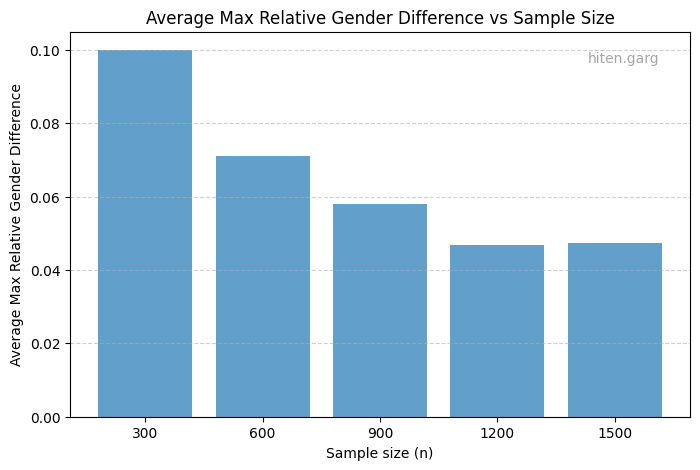

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
    """
    Sample n students with exact same (or as equal as possible) representation across genders.
    Returns a list of dicts with gender counts for each repetition.
    """
    if "Gender" not in self.df.columns:
        raise ValueError("Column 'Gender' not found in dataset.")

    genders = self.df["Gender"].unique()
    k = len(genders)

    if n % k != 0:
        raise ValueError(f"n must be divisible by {k} for exact balancing.")

    per_gender = n // k
    counts_list = []

    for _ in range(repeats):
        chosen_idx = []
        for g in genders:
            pool = self.df[self.df["Gender"] == g].index.to_numpy()
            sample = self.rng.choice(pool, size=per_gender, replace=False)
            chosen_idx.extend(sample)

        sub = self.df.loc[chosen_idx, "Gender"]
        counts_list.append(dict(Counter(sub)))

    return counts_list


def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
    """
    Sampling Strategy A:
    - Choose gender uniformly at random from categories.
    - Pick a random student of that gender.
    """
    if "Gender" not in self.df.columns:
        raise ValueError("Column 'Gender' not found in dataset.")

    genders = self.df["Gender"].unique()
    gender_indices = {g: self.df.index[self.df["Gender"] == g].to_numpy() for g in genders}

    counts_list = []
    for _ in range(repeats):
        chosen_genders = []
        for _ in range(n):
            g = self.rng.choice(genders, size=1)[0]   # uniform across genders
            idx = self.rng.choice(gender_indices[g], size=1)[0]
            chosen_genders.append(g)
        counts_list.append(dict(Counter(chosen_genders)))

    return counts_list


def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
    """
    Repeat Strategy A for each sample size.
    Compute avg max relative gender difference across repeats.
    Plot histogram: sample size vs avg relative difference.
    """
    if "Gender" not in self.df.columns:
        raise ValueError("Column 'Gender' not found in dataset.")

    genders = self.df["Gender"].unique()
    k = len(genders)
    avg_diffs = []

    for n in sample_sizes:
        diffs = []
        counts_list = self.sample_gender_uniform_random(n=n, repeats=repeats)
        expected = n / k
        for counts in counts_list:
            rel_diffs = [abs(counts.get(g, 0) - expected) / expected for g in genders]
            diffs.append(max(rel_diffs))
        avg_diffs.append(np.mean(diffs))

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar([str(s) for s in sample_sizes], avg_diffs, alpha=0.7)
    plt.xlabel("Sample size (n)")
    plt.ylabel("Average Max Relative Gender Difference")
    plt.title("Average Max Relative Gender Difference vs Sample Size")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    add_username_watermark()
    plt.show()


# Attach to class
StudentDataset.get_gender_balanced_counts = get_gender_balanced_counts
StudentDataset.sample_gender_uniform_random = sample_gender_uniform_random
StudentDataset.plot_avg_max_gender_diff_vs_sample_size = plot_avg_max_gender_diff_vs_sample_size

# Balanced cohort (exact 50-50 split)
balanced = dataset.get_gender_balanced_counts(n=300, repeats=5)
print("Balanced sampling counts:", balanced)

# Strategy A (uniform across genders, may deviate from 50-50)
strategyA = dataset.sample_gender_uniform_random(n=300, repeats=5)
print("Strategy A sampling counts:", strategyA)

# Plot relative differences vs sample size
dataset.plot_avg_max_gender_diff_vs_sample_size(sample_sizes=[300,600,900,1200,1500], repeats=10)


### Q1.4 GPA-Uniform Cohort

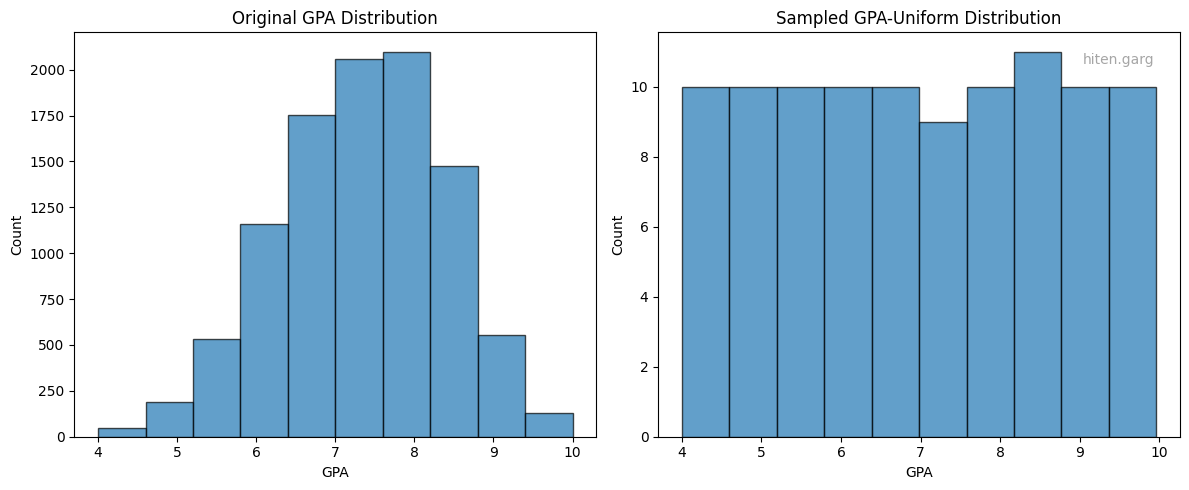

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
    """
    Using Sampling Strategy A:
    Select n students such that GPA values are approx uniformly distributed across bins.
    """
    if "GPA" not in self.df.columns:
        raise ValueError("Column 'GPA' not found in dataset.")

    # Create bins
    self.df["GPA_bin"] = pd.cut(self.df["GPA"], bins=bins, include_lowest=True)

    # Expected per-bin
    per_bin = n // bins
    remainder = n % bins

    sampled_indices = []
    for i, (b, group) in enumerate(self.df.groupby("GPA_bin", observed=True)):
        # Decide how many to sample from this bin
        take = per_bin + (1 if i < remainder else 0)
        if len(group) >= take:
            idx = self.rng.choice(group.index, size=take, replace=False)
        else:
            # Not enough students in this bin → sample with replacement
            idx = self.rng.choice(group.index, size=take, replace=True)
        sampled_indices.extend(idx)

    sampled_df = self.df.loc[sampled_indices].copy()
    sampled_df.drop(columns=["GPA_bin"], inplace=True)
    return sampled_df


def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
    """
    Plot GPA histogram of original vs sampled dataset (side by side).
    """
    plt.figure(figsize=(12, 5))

    # Original
    plt.subplot(1, 2, 1)
    plt.hist(self.df["GPA"], bins=10, alpha=0.7, edgecolor="black")
    plt.xlabel("GPA")
    plt.ylabel("Count")
    plt.title("Original GPA Distribution")

    # Sampled
    plt.subplot(1, 2, 2)
    plt.hist(sampled_df["GPA"], bins=10, alpha=0.7, edgecolor="black")
    plt.xlabel("GPA")
    plt.ylabel("Count")
    plt.title("Sampled GPA-Uniform Distribution")

    add_username_watermark()
    plt.tight_layout()
    plt.show()


# Attach methods to class
StudentDataset.sample_gpa_uniform = sample_gpa_uniform
StudentDataset.plot_gpa_histogram_comparison = plot_gpa_histogram_comparison

# Sample with uniform GPA distribution
sampled = dataset.sample_gpa_uniform(n=100, bins=10)

# Plot comparison
dataset.plot_gpa_histogram_comparison(sampled)

### Q1.5 Program-Major Balanced Cohort

Counts of students per (Program, Major):


Major,B.Tech,MS,PhD
Program,,,
CHD,7,2,2
CND,6,1,2
CSE,34,7,3
ECE,27,6,3


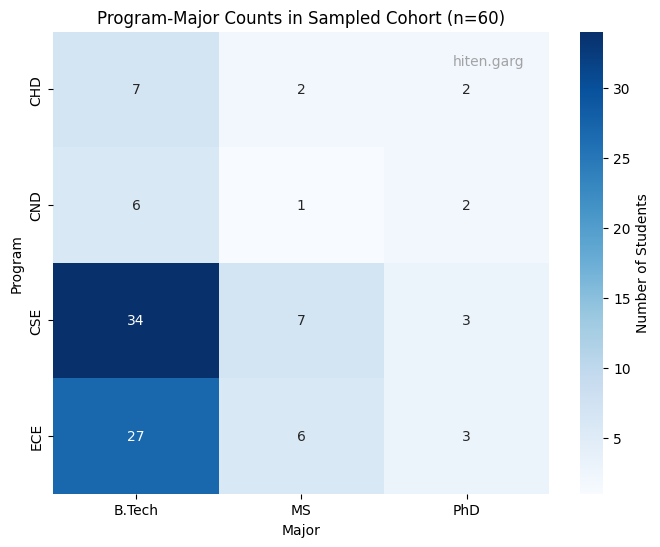

In [ ]:
def sample_program_major_balanced(self, n: int) -> pd.DataFrame:
    """
    Sample `n` students such that all (program, major) combinations 
    are approximately equally represented.
    """
    # get all valid (program, major) groups
    groups = list(self.df.groupby(["Program", "Major"], observed=True))
    num_groups = len(groups)

    # students per group (approx)
    per_group = n // num_groups

    sampled_students = []

    for (prog, maj), group in groups:
        if len(group) >= per_group:
            sampled = group.sample(per_group, replace=False, random_state=None)
        else:
            # if group too small → sample with replacement
            sampled = group.sample(per_group, replace=True, random_state=None)
        sampled_students.append(sampled)

    # Concatenate all sampled groups
    sampled_df = pd.concat(sampled_students).reset_index(drop=True)
    return sampled_df


def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
    # Count students per (Program, Major)
    counts_df = sampled_df.groupby(["Program", "Major"]).size().unstack(fill_value=0)
    
    # --- Print Table ---
    print("Counts of students per (Program, Major):")
    display(counts_df)  # pretty print in Jupyter
    
    # --- Plot Heatmap ---
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        counts_df,
        annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Number of Students'}
    )
    plt.title("Program-Major Counts in Sampled Cohort (n=60)")
    plt.xlabel("Major")
    plt.ylabel("Program")
    add_username_watermark()  # your watermark function
    plt.show()


# Attach the functions to the dataset
StudentDataset.sample_program_major_balanced = sample_program_major_balanced
StudentDataset.show_program_major_counts_and_heatmap = show_program_major_counts_and_heatmap

# Show counts and heatmap
dataset.show_program_major_counts_and_heatmap(sampled)
